# Description

It plot specific gene pairs from different subsets of the UpSet plot (intersections) generated before.

The idea of the notebook is to take a look at the patterns found and not found by different methods.

# Modules

In [56]:
import pandas as pd
import numpy as np

from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch.plots import jointplot
from clustermatch.coef import cm
from clustermatch import conf

# Settings

In [2]:
DATASET_CONFIG = conf.RECOUNT2FULL
# GTEX_TISSUE = "whole_blood"
GENE_SEL_STRATEGY = "var_pc_log2"

# Paths

In [3]:
dataset_name = DATASET_CONFIG["RESULTS_DIR"].name
display(dataset_name)

'recount2full'

In [4]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [5]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / dataset_name
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/recount2full')

In [6]:
INPUT_GENE_EXPR_FILE = DATASET_CONFIG["DATA_DIR"] / "recount2_rpkm.pkl"
display(INPUT_GENE_EXPR_FILE)

assert INPUT_GENE_EXPR_FILE.exists()

PosixPath('/opt/data/data/recount2full/recount2_rpkm.pkl')

In [7]:
INPUT_GENE_PAIRS_INTERSECTIONS_FILE = (
    DATASET_CONFIG["GENE_PAIR_INTERSECTIONS"]
    / f"gene_pair_intersections-{dataset_name}-{GENE_SEL_STRATEGY}.pkl"
)
display(INPUT_GENE_PAIRS_INTERSECTIONS_FILE)

assert INPUT_GENE_PAIRS_INTERSECTIONS_FILE.exists()

PosixPath('/opt/data/results/recount2full/gene_pair_intersections/gene_pair_intersections-recount2full-var_pc_log2.pkl')

# Data

## Gene Ensembl ID -> Symbol mapping

In [8]:
gene_map = pd.read_pickle(
    DATASET_CONFIG["DATA_DIR"] / f"recount2_gene_ids_mappings.pkl"
).set_index("ensembl_gene_id").squeeze().sort_index()

In [9]:
gene_map.shape

(57096,)

In [10]:
gene_map.head()

ensembl_gene_id
ENSG00000000003      TSPAN6
ENSG00000000005        TNMD
ENSG00000000419        DPM1
ENSG00000000457       SCYL3
ENSG00000000460    C1orf112
Name: hgnc_symbol, dtype: object

In [11]:
# remove genes with no mappings
gene_map = gene_map[gene_map.apply(len) > 0]

In [12]:
# remove duplicated entries
gene_map = gene_map.drop_duplicates()

In [13]:
gene_map.shape

(38974,)

In [14]:
gene_map.index.is_unique

False

In [15]:
gene_map.is_unique

True

In [16]:
gene_map["ENSG00000000003"]

'TSPAN6'

## Gene pairs intersection

In [17]:
df_plot = pd.read_pickle(INPUT_GENE_PAIRS_INTERSECTIONS_FILE)

In [18]:
df_plot.shape

(12497500, 9)

In [19]:
df_plot.head()

Pearson (high)  Pearson (low)  \
ENSG00000000003 ENSG00000000419            True          False   
                ENSG00000000938            True          False   
                ENSG00000001036           False          False   
                ENSG00000001630            True          False   
                ENSG00000002586           False           True   

                                 Spearman (high)  Spearman (low)  \
ENSG00000000003 ENSG00000000419             True           False   
                ENSG00000000938            False           False   
                ENSG00000001036             True           False   
                ENSG00000001630             True           False   
                ENSG00000002586            False           False   

                                 Clustermatch (high)  Clustermatch (low)  \
ENSG00000000003 ENSG00000000419                 True               False   
                ENSG00000000938                False               False   
                ENSG00000001036                 True               False   
                ENSG00000001630                 True               False   
                ENSG00000002586                False               False   

                                 clustermatch   pearson  spearman  
ENSG00000000003 ENSG00000000419      0.163960  0.130873  0.471673  
                ENSG00000000938      0.083831  0.107588  0.178042  
                ENSG00000001036      0.274535  0.047559  0.494995  
                ENSG00000001630      0.194099  0.226343  0.547457  
                ENSG00000002586      0.067899  0.011981  0.204876

In [20]:
df_plot_all_genes = df_plot.index.get_level_values(1).unique().union(df_plot.index.get_level_values(0).unique())
display(df_plot_all_genes)

Index(['ENSG00000000003', 'ENSG00000000419', 'ENSG00000000938',
       'ENSG00000001036', 'ENSG00000001630', 'ENSG00000002330',
       'ENSG00000002549', 'ENSG00000002586', 'ENSG00000002834',
       'ENSG00000003056',
       ...
       'ENSG00000283484', 'ENSG00000283496', 'ENSG00000283498',
       'ENSG00000283513', 'ENSG00000283534', 'ENSG00000283551',
       'ENSG00000283604', 'ENSG00000283612', 'ENSG00000283638',
       'ENSG00000283696'],
      dtype='object', length=5000)

## Gene expression

In [21]:
gene_expr_df = pd.read_pickle(INPUT_GENE_EXPR_FILE).loc[df_plot_all_genes].sort_index()

In [22]:
gene_expr_df.shape

(5000, 37032)

In [23]:
gene_expr_df.head()

,SRP000599.SRR013549,SRP000599.SRR013550,SRP000599.SRR013551,SRP000599.SRR013552,SRP000599.SRR013553,SRP000599.SRR013554,SRP000599.SRR013555,SRP000599.SRR013556,SRP000599.SRR013557,SRP000599.SRR013558,...,SRP035599.SRR1139372,SRP035599.SRR1139393,SRP035599.SRR1139388,SRP035599.SRR1139378,SRP035599.SRR1139399,SRP035599.SRR1139386,SRP035599.SRR1139375,SRP035599.SRR1139382,SRP035599.SRR1139356,SRP035599.SRR1139370
ENSG00000000003,0.000000,0.0,0.0,0.0,0.0,0.0,0.929351,1.175312,0.459859,1.254482,...,0.017900,0.029771,0.081792,0.000000,0.064336,0.408565,0.000000,0.010008,0.000000,0.027440
ENSG00000000419,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.561367,2.945875,...,29.761841,37.385839,20.649367,30.926951,23.025321,24.162726,11.302146,30.588071,20.268225,14.817692
ENSG00000000938,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,64.931866,26.875598,23.018966,17.859560,25.746736,2.018625,31.629219,16.415157,51.899712,15.478309
ENSG00000001036,0.180666,0.0,0.0,0.0,0.0,0.0,1.508990,2.081843,0.863341,0.705082,...,15.574204,9.911326,10.148982,12.658580,11.287409,7.925042,8.946891,10.226842,8.030479,6.003645
ENSG00000001630,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.427243,2.927397,0.349109,...,25.835430,41.341452,31.339349,27.462021,20.330286,15.388064,25.047488,31.779782,29.193115,15.836988


# Look at specific gene pair cases

## Prepare data

In [24]:
# add columns with ranks
df_r_data = pd.concat(
    [
        df_plot,
        df_plot[["clustermatch", "pearson", "spearman"]]
        .rank()
        .rename(
            columns={
                "clustermatch": "clustermatch_rank",
                "pearson": "pearson_rank",
                "spearman": "spearman_rank",
            }
        ),
    ],
    axis=1,
).sort_index()

In [25]:
df_r_data.head()

Pearson (high)  Pearson (low)  \
ENSG00000000003 ENSG00000000419            True          False   
                ENSG00000000938            True          False   
                ENSG00000001036           False          False   
                ENSG00000001630            True          False   
                ENSG00000002586           False           True   

                                 Spearman (high)  Spearman (low)  \
ENSG00000000003 ENSG00000000419             True           False   
                ENSG00000000938            False           False   
                ENSG00000001036             True           False   
                ENSG00000001630             True           False   
                ENSG00000002586            False           False   

                                 Clustermatch (high)  Clustermatch (low)  \
ENSG00000000003 ENSG00000000419                 True               False   
                ENSG00000000938                False               False   
                ENSG00000001036                 True               False   
                ENSG00000001630                 True               False   
                ENSG00000002586                False               False   

                                 clustermatch   pearson  spearman  \
ENSG00000000003 ENSG00000000419      0.163960  0.130873  0.471673   
                ENSG00000000938      0.083831  0.107588  0.178042   
                ENSG00000001036      0.274535  0.047559  0.494995   
                ENSG00000001630      0.194099  0.226343  0.547457   
                ENSG00000002586      0.067899  0.011981  0.204876   

                                 clustermatch_rank  pearson_rank  \
ENSG00000000003 ENSG00000000419         10912727.5    11417883.0   
                ENSG00000000938          6063540.0    11021285.0   
                ENSG00000001036         12159317.0     8353643.0   
                ENSG00000001630         11501625.5    12147459.0   
                ENSG00000002586          4515840.0     2906246.0   

                                 spearman_rank  
ENSG00000000003 ENSG00000000419     10583582.0  
                ENSG00000000938      3921774.0  
                ENSG00000001036     10913332.0  
                ENSG00000001630     11522147.0  
                ENSG00000002586      4588052.0

In [26]:
df_r_data_boolean_cols = set(
    [x for x in df_r_data.columns if " (high)" in x or " (low)" in x]
)

In [27]:
df_r_data_boolean_cols

{'Clustermatch (high)',
 'Clustermatch (low)',
 'Pearson (high)',
 'Pearson (low)',
 'Spearman (high)',
 'Spearman (low)'}

## Functions

In [28]:
def get_gene_symbol(gene_ensemble_id):
    if gene_ensemble_id not in gene_map.index:
        return f"{gene_ensemble_id} (no symbol)"
    
    gene_symbols = gene_map.loc[[gene_ensemble_id]]
    
    if gene_symbols.shape[0] == 1:
        return gene_symbols.iloc[0]
    
    return " / ".join(gene_symbols)

# testing
assert get_gene_symbol("ENSG00000260894") == "ENSG00000260894 (no symbol)"
assert get_gene_symbol("ENSG00000000003") == "TSPAN6"
assert get_gene_symbol("ENSG00000276085") == "CCL3L3 / CCL3L1"

In [29]:
def plot_gene_pair(top_pairs_df, idx, bins="log", plot_gene_ids=True): #, downsample: int=None):
    gene0, gene1 = top_pairs_df.iloc[idx].name
    display((gene0, gene1))

    gene0_symbol = get_gene_symbol(gene0)
    gene1_symbol = get_gene_symbol(gene1)
    display((gene0_symbol, gene1_symbol))

    _pearson, _spearman, _clustermatch = top_pairs_df.loc[
        (gene0, gene1), ["pearson", "spearman", "clustermatch"]
    ].tolist()
    
    _gene_expr_df_sample = gene_expr_df.T
#     if downsample is not None:
#         _gene_expr_df_sample = gene_expr_df.sample(downsample, random_state=downsample).T
        
#         # add potentially missing genes to plot
#         if gene0 not in _gene_expr_df_sample.columns:
#             _gene_expr_df_sample[gene0] = gene_expr_df.loc[gene0]
            
#         if gene1 not in _gene_expr_df_sample.columns:
#             _gene_expr_df_sample[gene1] = gene_expr_df.loc[gene1]
    
    p = jointplot(
        data=_gene_expr_df_sample,
        x=gene0,
        y=gene1,
        # kind="hex",
        bins=bins,
        add_corr_coefs=False,
        # rasterized=True,
        # ylim=(0, 500),
    )
    
    # p = sns.jointplot(
    #     data=_gene_expr_df_sample,
    #     x=gene0,
    #     y=gene1,
    #     kind="hex",
    #     bins=bins,
    #     rasterized=True,
    #     # ylim=(0, 500),
    # )
    
    if plot_gene_ids:
        p.ax_joint.set_xlabel(f"{gene0}\n{gene0_symbol}")
        p.ax_joint.set_ylabel(f"{gene1}\n{gene1_symbol}")
    else:
        p.ax_joint.set_xlabel(f"{gene0_symbol}", fontstyle="italic")
        p.ax_joint.set_ylabel(f"{gene1_symbol}", fontstyle="italic")

    _title = f"$c={_clustermatch:.2f}$  $r={_pearson:.2f}$    $r_s={_spearman:.2f}$"
    p.fig.suptitle(_title)

    return p

In [30]:
def get_gene_pairs(first_coef, query_set):
    assert all([x in df_r_data_boolean_cols for x in query_set])

    query = np.concatenate(
        [
            # columns that have to be true
            np.concatenate(
                [df_r_data[c].to_numpy().reshape(-1, 1) for c in query_set], axis=1
            )
            .all(axis=1)
            .reshape(-1, 1),
            # rest of the columns, that have to be false
            np.concatenate(
                [
                    ~df_r_data[c].to_numpy().reshape(-1, 1)
                    for c in df_r_data_boolean_cols
                    if c not in query_set
                ],
                axis=1,
            )
            .all(axis=1)
            .reshape(-1, 1),
        ],
        axis=1,
    ).all(axis=1)

    _tmp_df = df_r_data[query]

    # sort by firt_coef value
    _tmp_df = _tmp_df.sort_values(first_coef, ascending=False)

    _tmp_df = _tmp_df[
        [x for x in _tmp_df.columns if "(high)" not in x and "(low)" not in x]
    ]

    return _tmp_df

In [31]:
def plot_and_save_gene_pair(data, gene0_id, gene1_id, output_file_subset):
    gene0_symbol = gene_map[gene0_id]
    gene1_symbol = gene_map[gene1_id]

    with sns.plotting_context("paper", font_scale=2.0):
        p = jointplot(
            data,
            x=gene0_id,
            y=gene1_id,
            add_corr_coefs=False,
        )

        p.ax_joint.set_xlabel(f"{gene0_symbol}", fontstyle="italic")
        p.ax_joint.set_ylabel(f"{gene1_symbol}", fontstyle="italic")

        output_file = OUTPUT_FIGURE_DIR / f"genes-{output_file_subset}-{gene0_symbol}_vs_{gene1_symbol}.svg"
        display(output_file)
        
        plt.savefig(
            output_file,
            bbox_inches="tight",
            dpi=300,
            facecolor="white",
        )

## Clustermatch/Pearson vs Spearman

In [79]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Pearson (high)",
        "Spearman (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(34561, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000260894,ENSG00000252481,0.251995,0.064102,0.152015,12046008.0,9515509.0,3299439.0
ENSG00000221533,ENSG00000252481,0.244332,0.079680,0.158110,11998805.0,10233110.0,3442918.0
ENSG00000258892,ENSG00000234431,0.228492,0.056806,0.156951,11882070.0,9067457.0,3415765.0
ENSG00000169750,ENSG00000185862,0.228106,0.074109,0.165707,11878696.0,10007341.0,3623643.0
ENSG00000268643,ENSG00000238622,0.227449,0.055543,0.124665,11873476.0,8980750.0,2669435.0
...,...,...,...,...,...,...,...
ENSG00000128656,ENSG00000128340,0.115784,0.123041,0.065017,8748377.0,11301917.0,1356760.0
ENSG00000221857,ENSG00000141682,0.115783,0.076719,0.061281,8748304.0,10116461.0,1277539.0
ENSG00000100167,ENSG00000163513,0.115783,0.124049,0.068878,8748301.0,11317617.0,1439153.0
ENSG00000256211,ENSG00000256007,0.115783,0.057999,0.164017,8748285.0,9146824.0,3583414.0


### Preview

'Index: 0'

('ENSG00000260894', 'ENSG00000252481')

('ENSG00000260894 (no symbol)', 'SCARNA13')

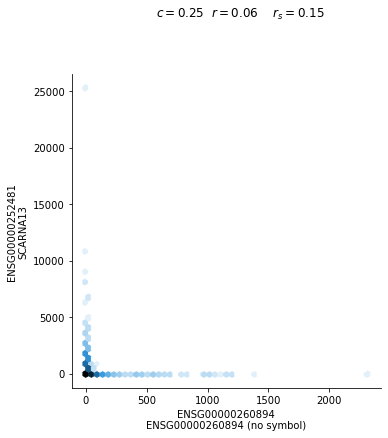

'Index: 1'

('ENSG00000221533', 'ENSG00000252481')

('MIR1184-1', 'SCARNA13')

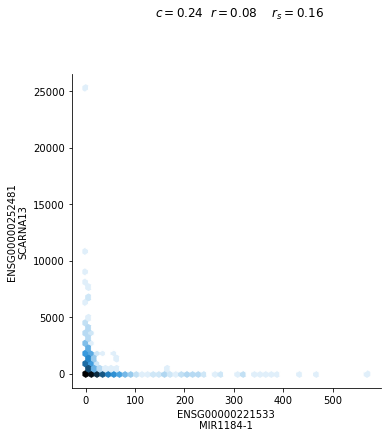

'Index: 2'

('ENSG00000258892', 'ENSG00000234431')

('ENSG00000258892 (no symbol)', 'ENSG00000234431 (no symbol)')

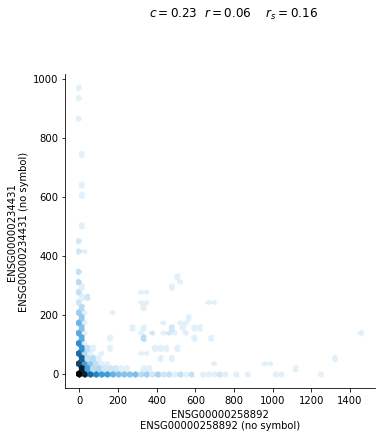

'Index: 3'

('ENSG00000169750', 'ENSG00000185862')

('RAC3', 'EVI2B')

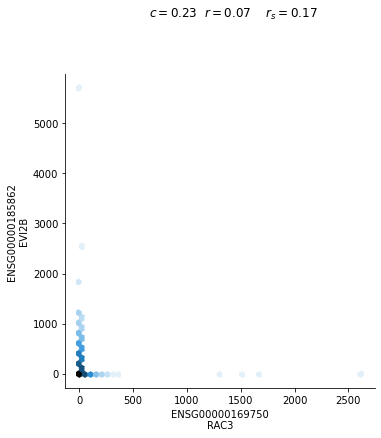

'Index: 4'

('ENSG00000268643', 'ENSG00000238622')

('ENSG00000268643 (no symbol)', 'SNORD97')

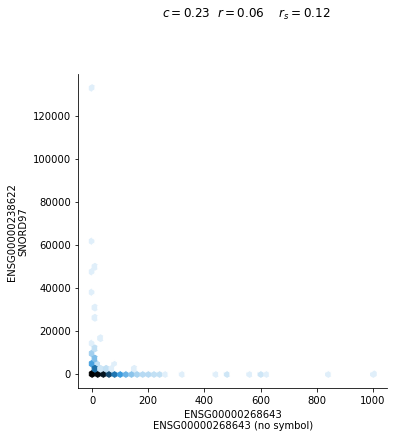

In [80]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [ ]:
gene_pair_subset = "c_r_vs_rs"

gene0_id = ""
gene1_id = ""

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Clustermatch/Spearman vs Pearson

In [81]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Spearman (high)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(446286, 6)

clustermatch   pearson  spearman  \
ENSG00000207754 ENSG00000207993      0.715005  0.013497  0.779277   
                ENSG00000199088      0.712447  0.009087  0.772905   
                ENSG00000199069      0.694645  0.003358  0.754757   
ENSG00000121152 ENSG00000076382      0.682784  0.011266  0.870083   
ENSG00000076382 ENSG00000142945      0.675484  0.013458  0.885477   
...                                       ...       ...       ...   
ENSG00000132383 ENSG00000076944      0.115783  0.015521  0.391550   
ENSG00000261147 ENSG00000105701      0.115783  0.001050  0.411359   
ENSG00000254501 ENSG00000211676      0.115783  0.010304  0.413874   
ENSG00000125354 ENSG00000197903      0.115783  0.008681  0.432988   
ENSG00000238172 ENSG00000228519      0.115782  0.008497  0.375210   

                                 clustermatch_rank  pearson_rank  \
ENSG00000207754 ENSG00000207993         12496872.0     3257074.0   
                ENSG00000199088         12496851.0     2213984.0   
                ENSG00000199069         12496587.0      799960.0   
ENSG00000121152 ENSG00000076382         12496385.0     2737740.0   
ENSG00000076382 ENSG00000142945         12496242.0     3247946.0   
...                                            ...           ...   
ENSG00000132383 ENSG00000076944          8748283.0     3706806.0   
ENSG00000261147 ENSG00000105701          8748279.0      242920.0   
ENSG00000254501 ENSG00000211676          8748277.0     2508667.0   
ENSG00000125354 ENSG00000197903          8748275.0     2115192.0   
ENSG00000238172 ENSG00000228519          8748260.0     2070293.0   

                                 spearman_rank  
ENSG00000207754 ENSG00000207993     12478772.0  
                ENSG00000199088     12474895.0  
                ENSG00000199069     12459903.0  
ENSG00000121152 ENSG00000076382     12496230.0  
ENSG00000076382 ENSG00000142945     12496608.0  
...                                        ...  
ENSG00000132383 ENSG00000076944      9199594.0  
ENSG00000261147 ENSG00000105701      9579826.0  
ENSG00000254501 ENSG00000211676      9626257.0  
ENSG00000125354 ENSG00000197903      9965203.0  
ENSG00000238172 ENSG00000228519      8864724.0  

[446286 rows x 6 columns]

### Preview

'Index: 0'

('ENSG00000207754', 'ENSG00000207993')

('MIR487B', 'MIR134')

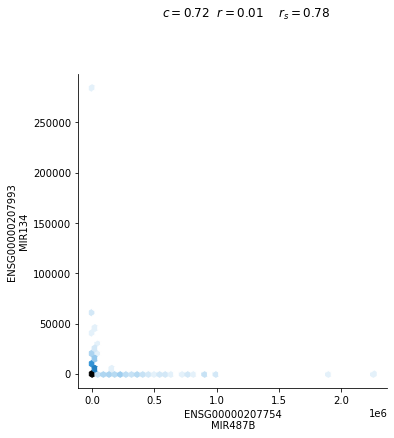

'Index: 1'

('ENSG00000207754', 'ENSG00000199088')

('MIR487B', 'MIR379')

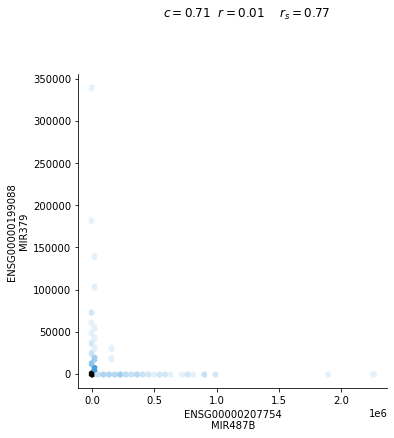

'Index: 2'

('ENSG00000207754', 'ENSG00000199069')

('MIR487B', 'MIR323A')

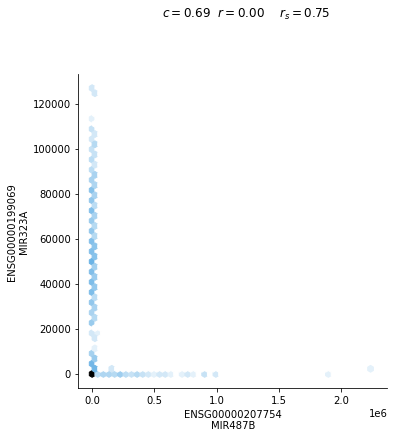

'Index: 3'

('ENSG00000121152', 'ENSG00000076382')

('NCAPH', 'SPAG5')

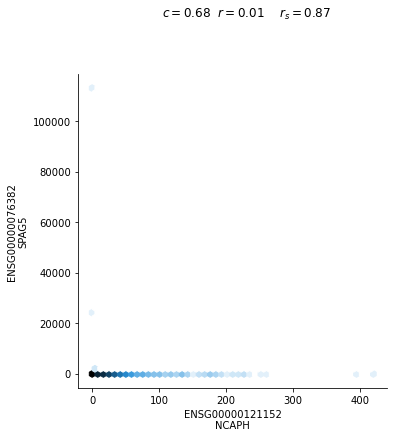

'Index: 4'

('ENSG00000076382', 'ENSG00000142945')

('SPAG5', 'KIF2C')

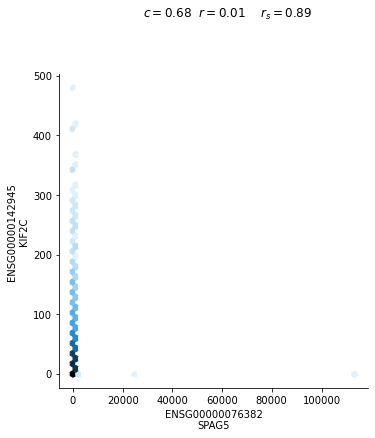

In [82]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [ ]:
gene_pair_subset = "c_rs_vs_r"

gene0_id = ""
gene1_id = ""

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

In [ ]:
IT WOULD BE GOOD, WHEN PICKING PEARSON HIGH, TO SORT BY PEARSON, BECAUSE ITS VALUES ARE GENERALLY VERY LOW

## Clustermatch vs Pearson

In [83]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(288696, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000251992,ENSG00000260894,0.311944,0.011126,0.351097,12287187.0,2704697.0,8334206.0
ENSG00000202293,ENSG00000199077,0.306556,0.003331,0.349311,12272622.0,793412.0,8292871.0
ENSG00000259945,ENSG00000251992,0.306077,0.004409,0.361333,12271293.0,1058036.0,8565237.0
ENSG00000215939,ENSG00000201240,0.301484,0.014760,0.358735,12257640.0,3540187.0,8507005.0
ENSG00000202293,ENSG00000207630,0.298969,0.001436,0.361965,12250001.0,334252.0,8579180.0
...,...,...,...,...,...,...,...
ENSG00000114738,ENSG00000236698,0.115783,0.000072,0.355163,8748282.0,16388.0,8426824.0
ENSG00000051108,ENSG00000059573,0.115783,0.014068,0.333966,8748281.0,3386194.0,7929975.0
ENSG00000162188,ENSG00000226950,0.115783,0.005971,0.308594,8748276.0,1444644.0,7297241.0
ENSG00000115649,ENSG00000065548,0.115782,0.009329,0.239316,8748265.0,2273008.0,5473594.0


### Preview

'Index: 0'

('ENSG00000251992', 'ENSG00000260894')

('SCARNA17', 'ENSG00000260894 (no symbol)')

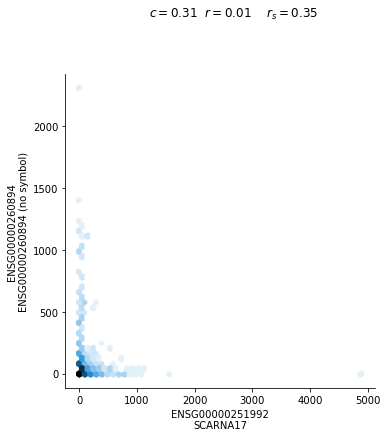

'Index: 1'

('ENSG00000202293', 'ENSG00000199077')

('SNORD114-22', 'MIR129-2')

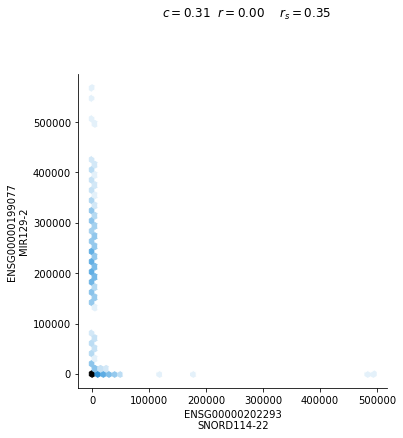

'Index: 2'

('ENSG00000259945', 'ENSG00000251992')

('ENSG00000259945 (no symbol)', 'SCARNA17')

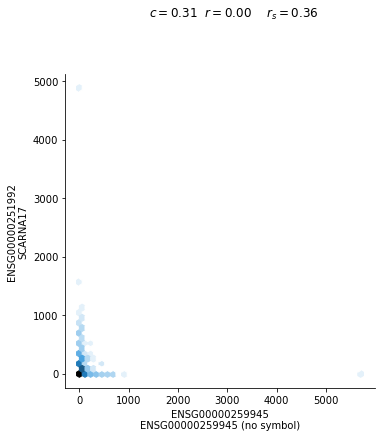

'Index: 3'

('ENSG00000215939', 'ENSG00000201240')

('MIR873', 'SNORD114-9')

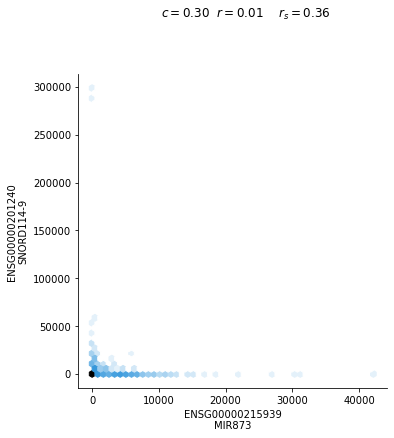

'Index: 4'

('ENSG00000202293', 'ENSG00000207630')

('SNORD114-22', 'MIR7-3')

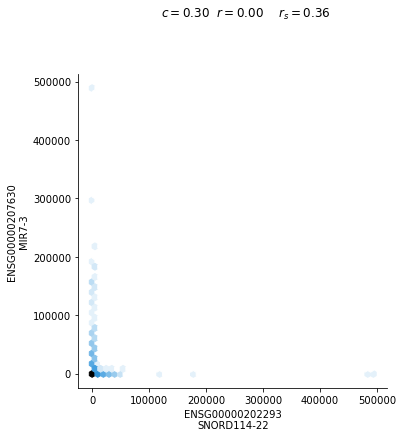

In [84]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Explore

In [588]:
from scipy.stats.contingency import expected_freq

In [589]:
from clustermatch.sklearn.metrics import get_contingency_matrix

In [590]:
def get_cm_contingency_table(max_parts, parts):
    """
    TODO
    """
    # get the clustermatch partitions that maximize the coefficient
    x_max_part = parts[0][max_parts[0]]
    
    y_max_part = parts[1][max_parts[1]]
    new_y_max_part = np.full(y_max_part.shape, np.nan)
    for new_k, k in enumerate(np.flip(np.unique(y_max_part))):
        new_y_max_part[y_max_part == k] = new_k
    
    return get_contingency_matrix(new_y_max_part, x_max_part)

In [591]:
def get_adjusted_contingency_matrix(cont_mat):
    n = int(cont_mat.sum())
    nis = np.sum(cont_mat, axis=1)
    njs = np.sum(cont_mat, axis=0)

    adj_cont_mat = np.full(cont_mat.shape, np.nan)
    for i in range(cont_mat.shape[0]):
        ni = int(nis[i])

        for j in range(cont_mat.shape[1]):
            nj = int(njs[j])

            nij = int(cont_mat[i, j])

            adj_cont_mat[i, j] = (nij * (nij - 1)) / ((ni * (ni - 1) * nj * (nj - 1)) / (n * (n - 1)))
    
    return adj_cont_mat

(37032, 2)

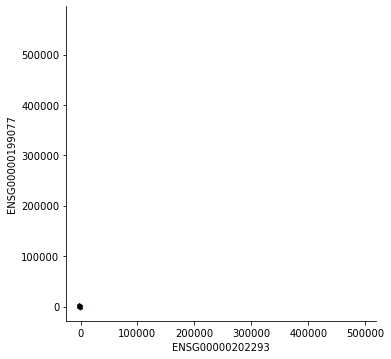

In [756]:
gene0, gene1 = ('ENSG00000202293', 'ENSG00000199077')

gene0_data = gene_expr_df.loc[gene0]
gene1_data = gene_expr_df.loc[gene1]

# gene0_data = gene0_data[gene0_data < 37]
# gene1_data = gene1_data[gene1_data < 41]

_gene_expr_df_sample = pd.concat([gene0_data, gene1_data], axis=1)
_gene_expr_df_sample = _gene_expr_df_sample.dropna()
display(_gene_expr_df_sample.shape)

p = jointplot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    bins=None,
    add_corr_coefs=False,
)

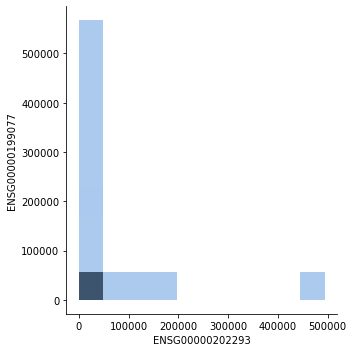

In [705]:
sns.displot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    kind="hist",
    bins=10,
)

In [ ]:
sns.displot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    kind="kde",
    # thresh=0.75,
)

In [707]:
_gene_expr_df_sample.describe()

,ENSG00000202293,ENSG00000199077
count,37032.000000,37032.000000
mean,174.667201,2495.388005
std,4042.514936,24889.620985
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,493821.621421,567174.152130


In [769]:
_gene_expr_df_sample.quantile(0.95)

ENSG00000202293    2.368346
ENSG00000199077    1.788834
Name: 0.95, dtype: float64

In [765]:
x = _gene_expr_df_sample.iloc[:, 0]
y = _gene_expr_df_sample.iloc[:, 1]
c, max_parts, parts = cm(x, y, return_parts=True, internal_n_clusters=[10])
display(c)

0.30655556070736906

In [766]:
cont_mat = get_cm_contingency_table(max_parts, parts)

In [767]:
cont_mat

array([[ 1336.,  1056.],
       [32665.,  1975.]])

<AxesSubplot:>

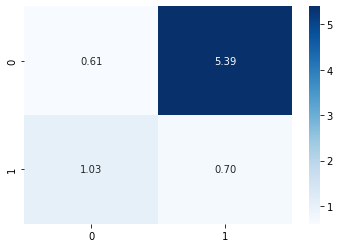

In [768]:
_cont_mat_expected = expected_freq(cont_mat)
sns.heatmap(cont_mat / _cont_mat_expected, annot=True, fmt='.2f', cmap="Blues")

In [713]:
adj_cont_mat = get_adjusted_contingency_matrix(cont_mat)

<AxesSubplot:>

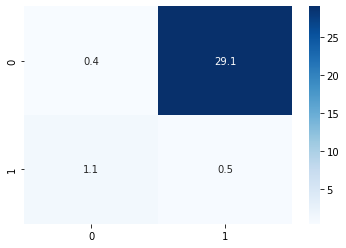

In [714]:
sns.heatmap(adj_cont_mat, annot=True, fmt='.1f', cmap="Blues")

In [777]:
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale

In [778]:
x = _gene_expr_df_sample.iloc[:, 0]
y = _gene_expr_df_sample.iloc[:, 1]

In [779]:
x_s = scale(x)

In [780]:
z = np.polyfit(x_s, y, 4)

In [781]:
m = np.poly1d(z)

In [782]:
m

poly1d([ 7.93399048e-03, -1.48726474e+00,  7.12676746e+01, -9.31742619e+02,
        2.47924462e+03])

In [784]:
df = _gene_expr_df_sample.rename(columns={gene0: "x", gene1: "y"})
df["x"] = scale(df["x"])
results = smf.ols(formula='y ~ m(x)', data=df).fit()

In [785]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.710
Date:                Sat, 15 Jan 2022   Prob (F-statistic):             0.0997
Time:                        07:40:27   Log-Likelihood:            -4.2739e+05
No. Observations:               37032   AIC:                         8.548e+05
Df Residuals:                   37030   BIC:                         8.548e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.878e-11   1521.366  -6.49e-14      1.000   -2981.921    2981.921
m(x)           1.0000      0.607      1.646      0.100      -0.191       2.191
==============================================================================
Omnibus:                    59817.596   Durbin-Watson:                   0.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         27217474.391
Skew:                          10.958   Prob(JB):                         0.00
Kurtosis:                     133.992   Cond. No.                     2.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(-10.0, 200.0)

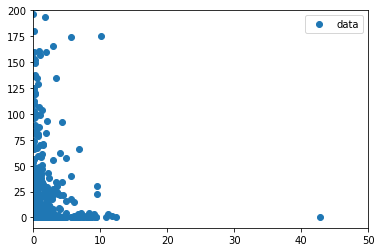

In [791]:
df = df.sort_values("x")
x = df["x"]
y = df["y"]

fig, ax = plt.subplots()
ax.plot(x, y, "o", label='data')
# ax.plot(x, m(scale(x)), "--", label='fit')
ax.legend()
ax.set_xlim(0, 50)
ax.set_ylim(-10, 200)

### Selection

In [ ]:
gene_pair_subset = "c_vs_r"

gene0_id = ""
gene1_id = ""

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Clustermatch vs Spearman

In [33]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Spearman (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(58471, 6)

clustermatch   pearson  spearman  \
ENSG00000259945 ENSG00000252481      0.253045  0.048089  0.161765   
ENSG00000260894 ENSG00000275994      0.249144  0.030292  0.163306   
                ENSG00000199293      0.245354  0.025123  0.168269   
ENSG00000221533 ENSG00000206754      0.243555  0.021071  0.147512   
                ENSG00000206630      0.239613  0.035609  0.165180   
...                                       ...       ...       ...   
ENSG00000184584 ENSG00000207088      0.115783  0.027025  0.149999   
ENSG00000105258 ENSG00000129226      0.115783  0.042572  0.115141   
ENSG00000254331 ENSG00000223865      0.115783  0.049786  0.113545   
ENSG00000079785 ENSG00000173020      0.115783  0.032564  0.123681   
ENSG00000162706 ENSG00000197409      0.115782  0.024605  0.090464   

                                 clustermatch_rank  pearson_rank  \
ENSG00000259945 ENSG00000252481         12052338.0     8399650.0   
ENSG00000260894 ENSG00000275994         12029247.0     6373675.0   
                ENSG00000199293         12005070.0     5560307.0   
ENSG00000221533 ENSG00000206754         11993898.0     4835926.0   
                ENSG00000206630         11966972.0     7093064.0   
...                                            ...           ...   
ENSG00000184584 ENSG00000207088          8748318.0     5873094.0   
ENSG00000105258 ENSG00000129226          8748303.0     7879696.0   
ENSG00000254331 ENSG00000223865          8748295.0     8543374.0   
ENSG00000079785 ENSG00000173020          8748274.0     6693743.0   
ENSG00000162706 ENSG00000197409          8748261.0     5472618.0   

                                 spearman_rank  
ENSG00000259945 ENSG00000252481      3529682.0  
ENSG00000260894 ENSG00000275994      3566563.0  
                ENSG00000199293      3684849.0  
ENSG00000221533 ENSG00000206754      3194659.0  
                ENSG00000206630      3611096.0  
...                                        ...  
ENSG00000184584 ENSG00000207088      3252270.0  
ENSG00000105258 ENSG00000129226      2453469.0  
ENSG00000254331 ENSG00000223865      2417703.0  
ENSG00000079785 ENSG00000173020      2647067.0  
ENSG00000162706 ENSG00000197409      1904722.0  

[58471 rows x 6 columns]

### Preview

'Index: 0'

('ENSG00000259945', 'ENSG00000252481')

('ENSG00000259945 (no symbol)', 'SCARNA13')

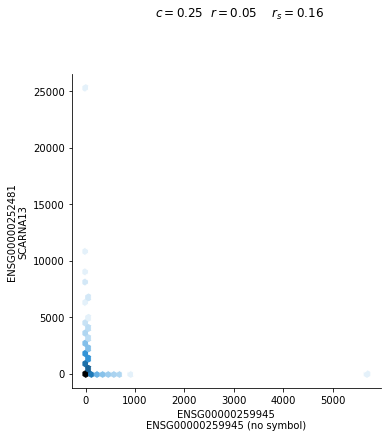

'Index: 1'

('ENSG00000260894', 'ENSG00000275994')

('ENSG00000260894 (no symbol)', 'SNORA24')

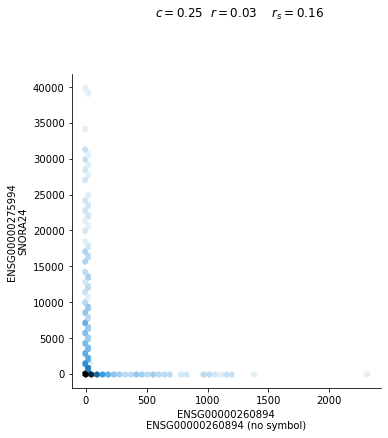

'Index: 2'

('ENSG00000260894', 'ENSG00000199293')

('ENSG00000260894 (no symbol)', 'SNORA21')

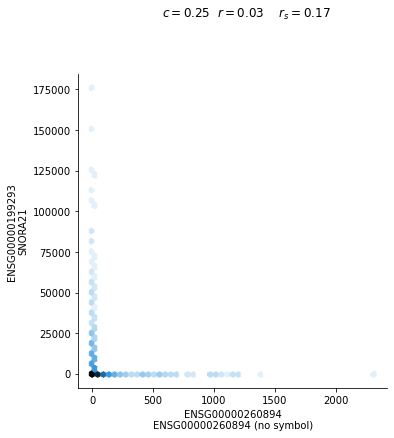

'Index: 3'

('ENSG00000221533', 'ENSG00000206754')

('MIR1184-1', 'SNORD101')

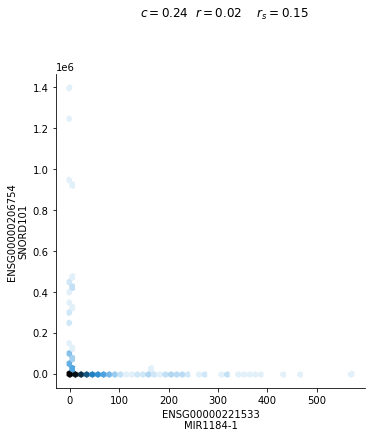

'Index: 4'

('ENSG00000221533', 'ENSG00000206630')

('MIR1184-1', 'SNORD60')

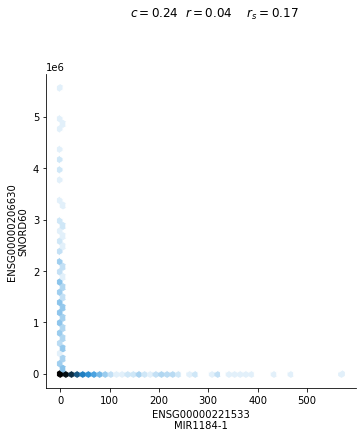

In [34]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Explore

(37032, 2)

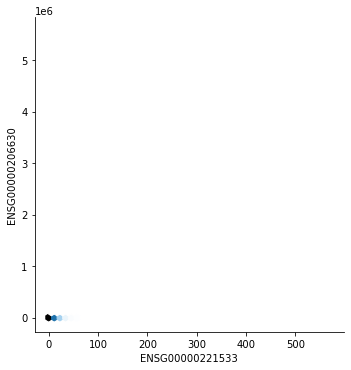

In [583]:
gene0, gene1 = ('ENSG00000221533', 'ENSG00000206630')

gene0_data = gene_expr_df.loc[gene0]
gene1_data = gene_expr_df.loc[gene1]

# gene0_data = gene0_data[gene0_data < 37]
# gene1_data = gene1_data[gene1_data < 41]

_gene_expr_df_sample = pd.concat([gene0_data, gene1_data], axis=1)
_gene_expr_df_sample = _gene_expr_df_sample.dropna()
display(_gene_expr_df_sample.shape)

p = jointplot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    bins=None,
    add_corr_coefs=False,
)

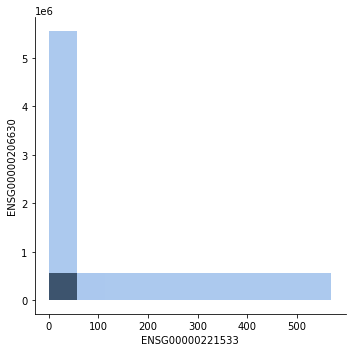

In [587]:
sns.displot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    kind="hist",
    bins=10,
)

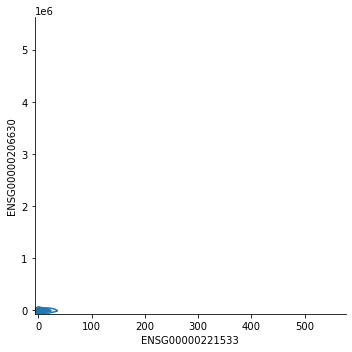

In [556]:
sns.displot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    kind="kde",
    # thresh=0.01,
)

In [557]:
_gene_expr_df_sample.describe()

,ENSG00000221533,ENSG00000206630
count,37032.000000,3.703200e+04
mean,8.246025,7.144928e+03
std,13.397701,1.223121e+05
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,4.740310,1.944474e+00
75%,12.842417,7.189465e+00
max,569.888075,5.553653e+06


In [558]:
_gene_expr_df_sample.quantile(0.90)

ENSG00000221533    20.335559
ENSG00000206630    43.263244
Name: 0.9, dtype: float64

In [559]:
x = _gene_expr_df_sample.iloc[:, 0]
y = _gene_expr_df_sample.iloc[:, 1]
c, max_parts, parts = cm(x, y, return_parts=True)
display(c)

0.2396131664336764

In [560]:
cont_mat = get_cm_contingency_table(max_parts, parts)

In [561]:
cont_mat

array([[2431.,  489.,  392.,  200.,   66.,   51.,   22.,   53.],
       [ 711.,  706.,  683.,  443.,  342.,  282.,  286.,  250.],
       [ 285.,  320.,  471.,  470.,  481.,  551.,  626.,  499.],
       [ 181.,  313.,  452.,  508.,  575.,  616.,  564.,  494.],
       [ 144.,  262.,  418.,  505.,  628.,  569.,  581.,  596.],
       [ 121.,  203.,  376.,  532.,  624.,  589.,  614.,  645.],
       [ 119.,  178.,  322.,  513.,  586.,  680.,  643.,  662.],
       [  21.,   47.,   25.,   46.,   42.,   64.,   68.,   68.],
       [7784.,  497.,  565.,  486.,  359.,  301.,  299.,  437.]])

<AxesSubplot:>

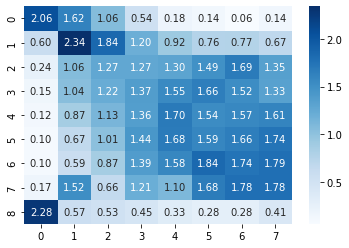

In [565]:
_cont_mat_expected = expected_freq(cont_mat)
sns.heatmap(cont_mat / _cont_mat_expected, annot=True, fmt='.2f', cmap="Blues")

In [566]:
adj_cont_mat = get_adjusted_contingency_matrix(cont_mat)

<AxesSubplot:>

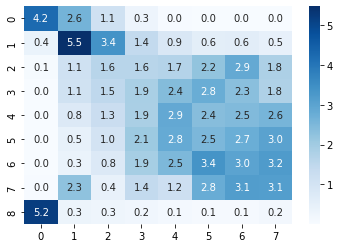

In [567]:
sns.heatmap(adj_cont_mat, annot=True, fmt='.1f', cmap="Blues")

### Selection

In [ ]:
gene_pair_subset = "c_vs_rs"

gene0_id = ""
gene1_id = ""

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Clustermatch vs Spearman/Pearson

In [87]:
_tmp_df = get_gene_pairs(
    "clustermatch",
    {
        "Clustermatch (high)",
        "Spearman (low)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(39186, 6)

clustermatch   pearson  spearman  \
ENSG00000260894 ENSG00000277370      0.233951  0.014853  0.166364   
                ENSG00000206754      0.230645  0.014217  0.144135   
ENSG00000206799 ENSG00000260894      0.230345  0.007797  0.153668   
ENSG00000259945 ENSG00000277370      0.224462  0.011631  0.170161   
ENSG00000260894 ENSG00000238622      0.223806  0.005215  0.118214   
...                                       ...       ...       ...   
ENSG00000231064 ENSG00000007255      0.115787  0.014008  0.128361   
ENSG00000251062 ENSG00000199785      0.115785  0.003072  0.143707   
ENSG00000273338 ENSG00000170955      0.115784  0.002166  0.081621   
ENSG00000019549 ENSG00000207405      0.115784  0.010409  0.121882   
ENSG00000216101 ENSG00000130203      0.115783  0.012017  0.166244   

                                 clustermatch_rank  pearson_rank  \
ENSG00000260894 ENSG00000277370         11925604.0     3560638.0   
                ENSG00000206754         11899808.0     3419343.0   
ENSG00000206799 ENSG00000260894         11897305.0     1897646.0   
ENSG00000259945 ENSG00000277370         11847636.0     2823908.0   
ENSG00000260894 ENSG00000238622         11841441.0     1257851.0   
...                                            ...           ...   
ENSG00000231064 ENSG00000007255          8748548.0     3372792.0   
ENSG00000251062 ENSG00000199785          8748463.0      730020.0   
ENSG00000273338 ENSG00000170955          8748352.0      509347.0   
ENSG00000019549 ENSG00000207405          8748350.0     2533800.0   
ENSG00000216101 ENSG00000130203          8748294.0     2914494.0   

                                 spearman_rank  
ENSG00000260894 ENSG00000277370      3639300.0  
                ENSG00000206754      3116271.0  
ENSG00000206799 ENSG00000260894      3338330.0  
ENSG00000259945 ENSG00000277370      3730650.0  
ENSG00000260894 ENSG00000238622      2522882.0  
...                                        ...  
ENSG00000231064 ENSG00000007255      2753362.0  
ENSG00000251062 ENSG00000199785      3106252.0  
ENSG00000273338 ENSG00000170955      1712454.0  
ENSG00000019549 ENSG00000207405      2605879.0  
ENSG00000216101 ENSG00000130203      3636455.0  

[39186 rows x 6 columns]

### Preview

'Index: 0'

('ENSG00000260894', 'ENSG00000277370')

('ENSG00000260894 (no symbol)', 'SNORD49A')

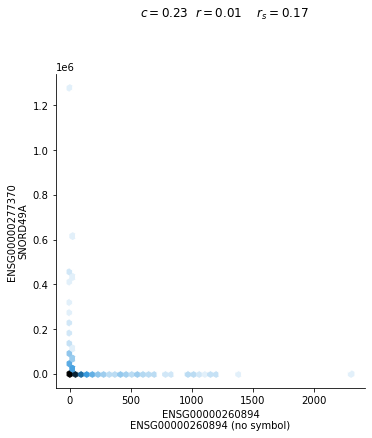

'Index: 1'

('ENSG00000260894', 'ENSG00000206754')

('ENSG00000260894 (no symbol)', 'SNORD101')

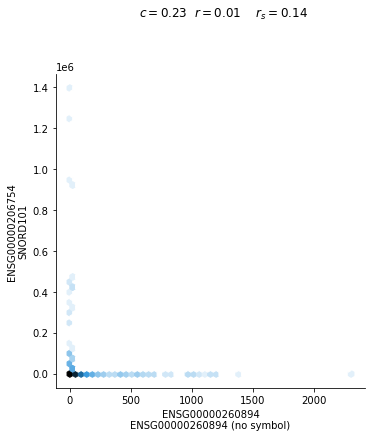

'Index: 2'

('ENSG00000206799', 'ENSG00000260894')

('SNORA32', 'ENSG00000260894 (no symbol)')

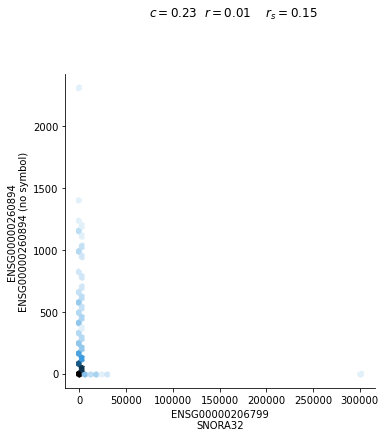

'Index: 3'

('ENSG00000259945', 'ENSG00000277370')

('ENSG00000259945 (no symbol)', 'SNORD49A')

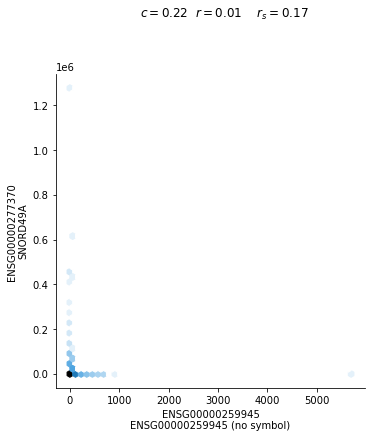

'Index: 4'

('ENSG00000260894', 'ENSG00000238622')

('ENSG00000260894 (no symbol)', 'SNORD97')

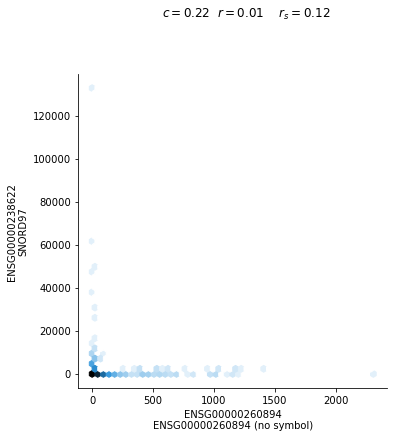

'Index: 5'

('ENSG00000259945', 'ENSG00000206799')

('ENSG00000259945 (no symbol)', 'SNORA32')

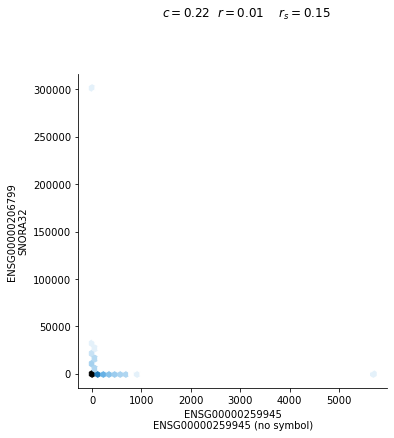

'Index: 6'

('ENSG00000255108', 'ENSG00000206754')

('ENSG00000255108 (no symbol)', 'SNORD101')

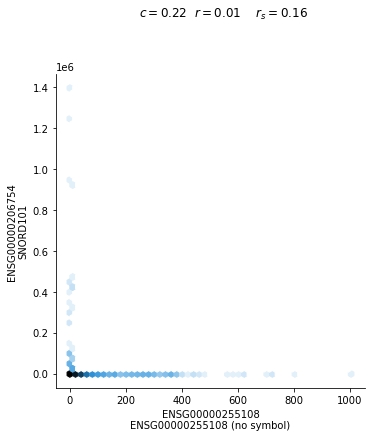

'Index: 7'

('ENSG00000259945', 'ENSG00000206754')

('ENSG00000259945 (no symbol)', 'SNORD101')

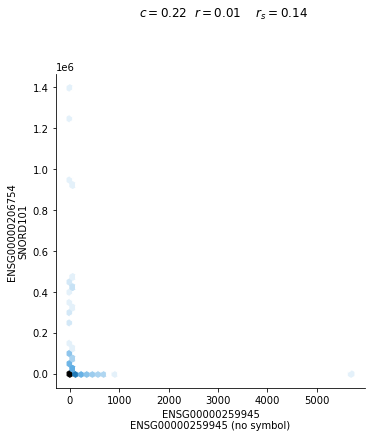

'Index: 8'

('ENSG00000260894', 'ENSG00000199673')

('ENSG00000260894 (no symbol)', 'SNORD16')

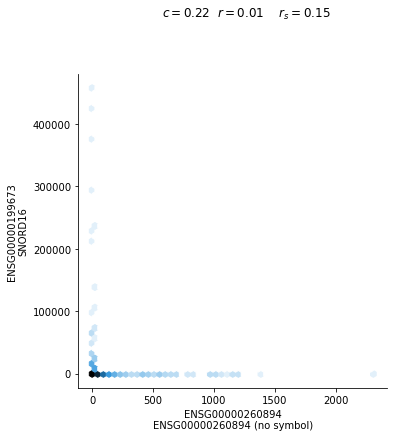

'Index: 9'

('ENSG00000259945', 'ENSG00000238622')

('ENSG00000259945 (no symbol)', 'SNORD97')

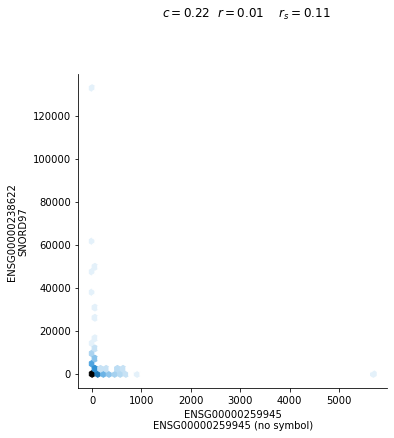

In [88]:
for i in range(min(_tmp_df.shape[0], 10)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Explore

(37032, 2)

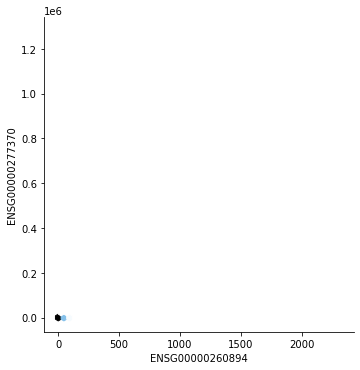

In [568]:
gene0, gene1 = ('ENSG00000260894', 'ENSG00000277370')

gene0_data = gene_expr_df.loc[gene0]
gene1_data = gene_expr_df.loc[gene1]

# gene0_data = gene0_data[gene0_data < 37]
# gene1_data = gene1_data[gene1_data < 41]

_gene_expr_df_sample = pd.concat([gene0_data, gene1_data], axis=1)
_gene_expr_df_sample = _gene_expr_df_sample.dropna()
display(_gene_expr_df_sample.shape)

p = jointplot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    bins=None,
    add_corr_coefs=False,
)

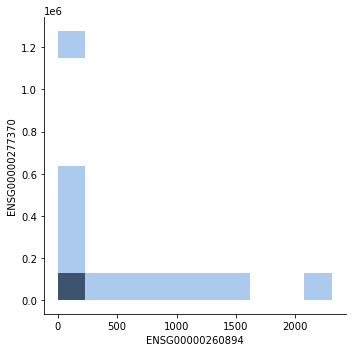

In [569]:
sns.displot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    kind="hist",
    bins=10,
)

/opt/conda/envs/clustermatch_gene_expr/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


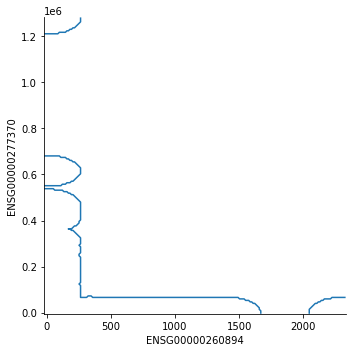

In [570]:
sns.displot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    kind="kde",
    thresh=0.75,
    # levels=10,
    # kind="hist",
    # bins=10,
)

In [571]:
_gene_expr_df_sample.describe()

,ENSG00000260894,ENSG00000277370
count,37032.000000,3.703200e+04
mean,15.950033,3.954818e+02
std,39.115919,9.694418e+03
min,0.000000,0.000000e+00
25%,0.000000,3.403865e-01
50%,7.888344,5.102150e+00
75%,22.308013,1.393964e+01
max,2308.721180,1.276989e+06


In [572]:
_gene_expr_df_sample.quantile(0.90)

ENSG00000260894    36.448722
ENSG00000277370    46.370674
Name: 0.9, dtype: float64

In [573]:
x = _gene_expr_df_sample.iloc[:, 0]
y = _gene_expr_df_sample.iloc[:, 1]
c, max_parts, parts = cm(x, y, return_parts=True)
display(c)

0.23395127588567624

In [574]:
cont_mat = get_cm_contingency_table(max_parts, parts)

In [575]:
cont_mat

array([[2047.,  138.,  678.,  338.,  167.,  113.,   73.,   55.,   95.],
       [ 442.,   90.,  828.,  673.,  439.,  336.,  350.,  293.,  252.],
       [ 202.,   59.,  505.,  548.,  515.,  516.,  610.,  442.,  306.],
       [ 175.,   39.,  351.,  534.,  581.,  574.,  556.,  493.,  400.],
       [ 115.,   33.,  259.,  415.,  594.,  601.,  595.,  565.,  526.],
       [ 137.,   30.,  257.,  371.,  494.,  573.,  613.,  629.,  600.],
       [ 178.,   33.,  277.,  357.,  435.,  518.,  530.,  680.,  695.],
       [ 271.,   53.,  209.,  204.,  262.,  299.,  243.,  377.,  445.],
       [6952.,  115.,  339.,  264.,  216.,  173.,  133.,  169.,  385.]])

<AxesSubplot:>

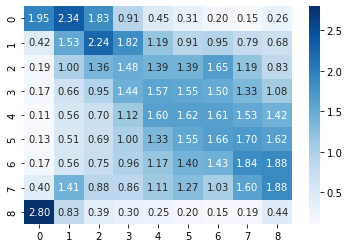

In [576]:
_cont_mat_expected = expected_freq(cont_mat)
sns.heatmap(cont_mat / _cont_mat_expected, annot=True, fmt='.2f', cmap="Blues")

In [577]:
adj_cont_mat = get_adjusted_contingency_matrix(cont_mat)

<AxesSubplot:>

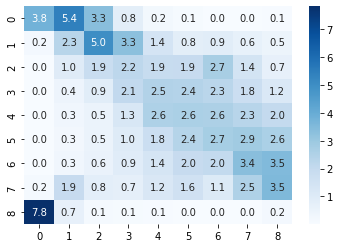

In [578]:
sns.heatmap(adj_cont_mat, annot=True, fmt='.1f', cmap="Blues")

### Selection

In [ ]:
gene_pair_subset = "c_vs_r_rs"

gene0_id = ""
gene1_id = ""

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Pearson vs Clustermatch

In [89]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Clustermatch (low)",
        "Pearson (high)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(318504, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000197385,ENSG00000199047,0.054506,0.969910,0.330853,3343864.0,12497008.0,7854270.0
ENSG00000251920,ENSG00000201822,0.043528,0.925923,0.288970,2527917.0,12496802.0,6786582.0
ENSG00000253187,ENSG00000199168,0.042841,0.911991,0.203116,2479692.0,12496753.0,4543241.0
ENSG00000078399,ENSG00000199168,0.048832,0.910577,0.216450,2910377.0,12496749.0,4881403.0
ENSG00000146007,ENSG00000160307,0.045543,0.900622,0.218118,2670393.0,12496705.0,4924514.0
...,...,...,...,...,...,...,...
ENSG00000213585,ENSG00000249669,0.048122,0.052368,0.189543,2858060.0,8748273.0,4204490.0
ENSG00000200211,ENSG00000161970,0.029384,0.052368,0.313771,1549299.0,8748264.0,7429500.0
ENSG00000117472,ENSG00000176340,0.048616,0.052368,0.286111,2894449.0,8748263.0,6711009.0
ENSG00000124942,ENSG00000249855,0.059019,0.052368,0.267395,3716272.0,8748260.0,6215111.0


### Preview

'Index: 0'

('ENSG00000197385', 'ENSG00000199047')

('ZNF860', 'MIR378A')

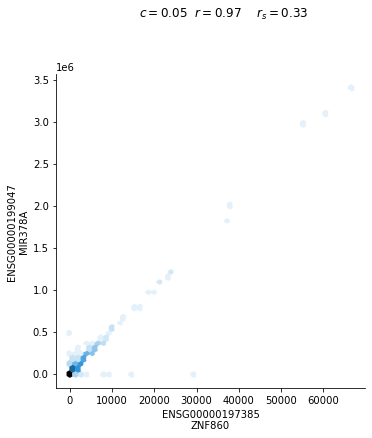

'Index: 1'

('ENSG00000251920', 'ENSG00000201822')

('RNA5SP216', 'RNA5SP149')

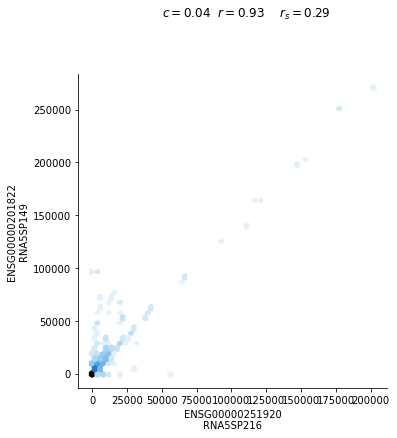

'Index: 2'

('ENSG00000253187', 'ENSG00000199168')

('HOXA10-AS', 'MIR374A')

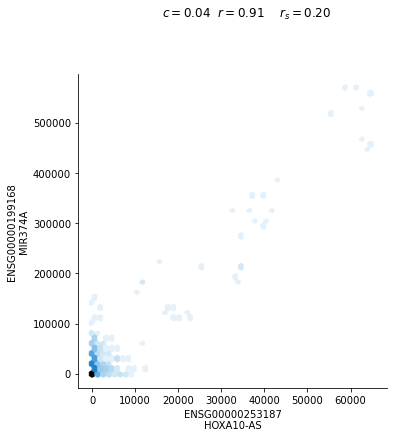

'Index: 3'

('ENSG00000078399', 'ENSG00000199168')

('HOXA9', 'MIR374A')

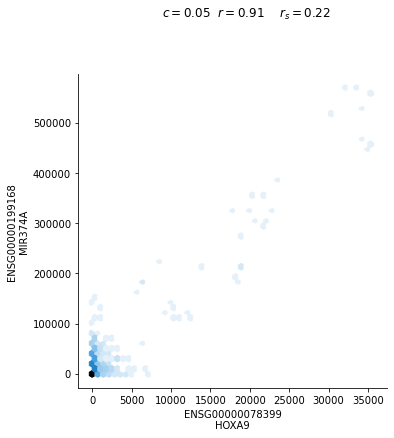

'Index: 4'

('ENSG00000146007', 'ENSG00000160307')

('ZMAT2', 'S100B')

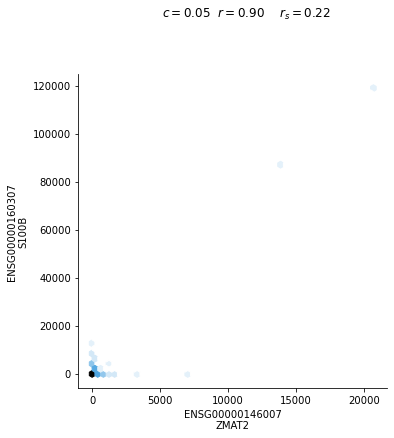

In [90]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [ ]:
gene_pair_subset = "r_vs_c"

gene0_id = ""
gene1_id = ""

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Pearson vs Spearman

In [91]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Spearman (low)",
        "Pearson (high)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(281958, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000037474,ENSG00000259932,0.071427,0.808135,0.002412,4854456.0,12496067.0,49696.0
ENSG00000159199,ENSG00000240583,0.073672,0.769941,0.134692,5074175.0,12495499.0,2897859.0
ENSG00000225131,ENSG00000170899,0.105939,0.738404,0.096308,8009414.0,12494866.0,2033548.0
ENSG00000207816,ENSG00000202054,0.069480,0.701773,0.153834,4666857.0,12493879.0,3342320.0
ENSG00000180398,ENSG00000214182,0.066095,0.699145,0.167957,4346478.0,12493779.0,3677383.0
...,...,...,...,...,...,...,...
ENSG00000236603,ENSG00000199053,0.064454,0.052368,0.148918,4194981.0,8748276.0,3226917.0
ENSG00000269179,ENSG00000258663,0.063570,0.052368,0.017098,4114901.0,8748274.0,354323.0
ENSG00000198502,ENSG00000199024,0.085202,0.052368,0.109339,6193914.0,8748272.0,2323020.0
ENSG00000159840,ENSG00000206596,0.081127,0.052367,0.146567,5803487.5,8748258.0,3172834.0


### Preview

'Index: 0'

('ENSG00000037474', 'ENSG00000259932')

('NSUN2', 'ENSG00000259932 (no symbol)')

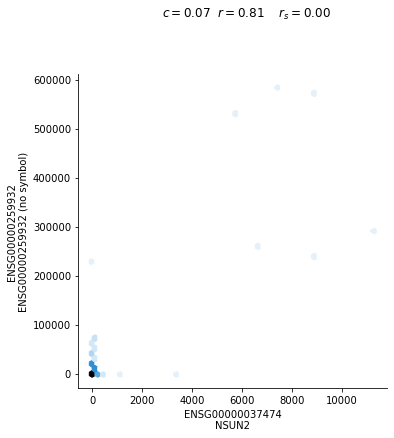

'Index: 1'

('ENSG00000159199', 'ENSG00000240583')

('ATP5MC1', 'AQP1')

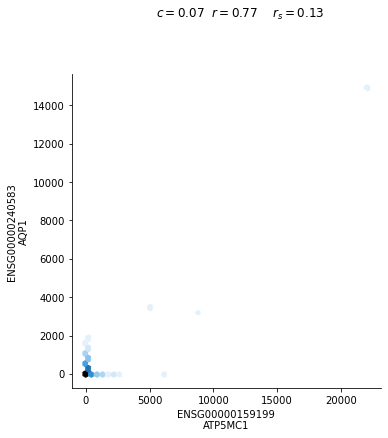

'Index: 2'

('ENSG00000225131', 'ENSG00000170899')

('PSME2P2', 'GSTA4')

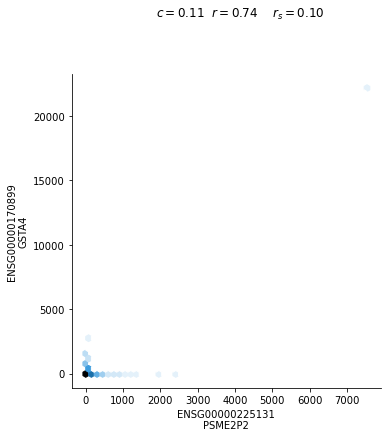

'Index: 3'

('ENSG00000207816', 'ENSG00000202054')

('MIR124-2', 'RNA5SP152')

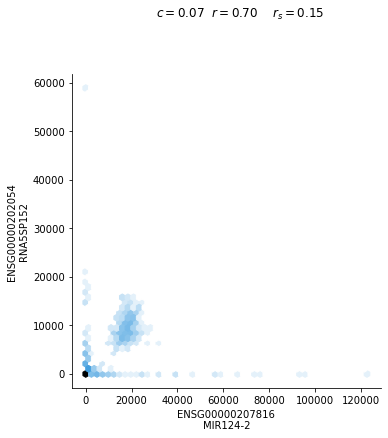

'Index: 4'

('ENSG00000180398', 'ENSG00000214182')

('MCFD2', 'PTMAP5')

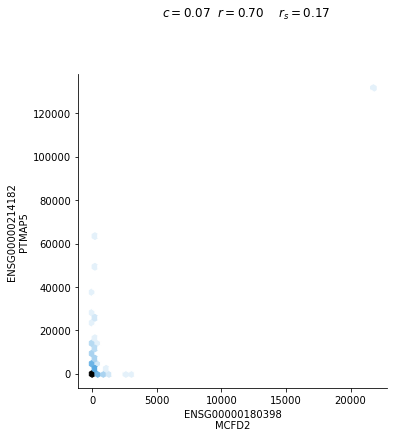

In [92]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

## Pearson vs Spearman/Clustermatch

In [93]:
_tmp_df = get_gene_pairs(
    "pearson",
    {
        "Clustermatch (low)",
        "Spearman (low)",
        "Pearson (high)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(275382, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000264618,ENSG00000106682,0.022416,0.950965,0.135254,1043943.0,12496913.0,2910637.0
ENSG00000078018,ENSG00000084754,0.049913,0.950731,0.146421,2990596.0,12496910.0,3169376.0
ENSG00000163660,ENSG00000252316,0.006852,0.937951,0.083015,114702.0,12496853.0,1742594.0
ENSG00000184076,ENSG00000160307,0.039751,0.926194,0.062317,2263997.0,12496804.0,1299493.0
ENSG00000100316,ENSG00000263764,0.022148,0.906537,0.001277,1023963.0,12496733.0,26317.0
...,...,...,...,...,...,...,...
ENSG00000231864,ENSG00000275215,0.048783,0.052368,0.038759,2906674.0,8748298.0,803696.0
ENSG00000166963,ENSG00000197747,0.058305,0.052368,0.120885,3655652.0,8748291.0,2583275.0
ENSG00000086300,ENSG00000233762,0.047102,0.052368,0.135705,2783230.0,8748278.0,2920937.0
ENSG00000189334,ENSG00000220472,0.033086,0.052367,0.114039,1806462.0,8748259.0,2428734.0


### Preview

'Index: 0'

('ENSG00000264618', 'ENSG00000106682')

('RN7SL732P', 'EIF4H')

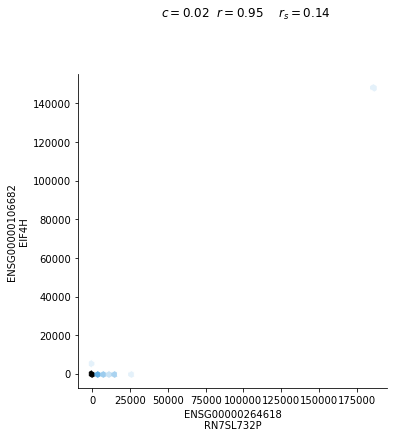

'Index: 1'

('ENSG00000078018', 'ENSG00000084754')

('MAP2', 'HADHA')

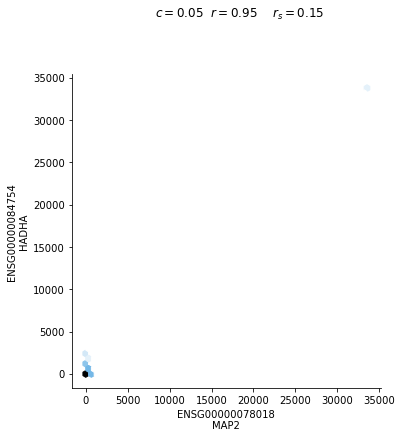

'Index: 2'

('ENSG00000163660', 'ENSG00000252316')

('CCNL1', 'RNY4')

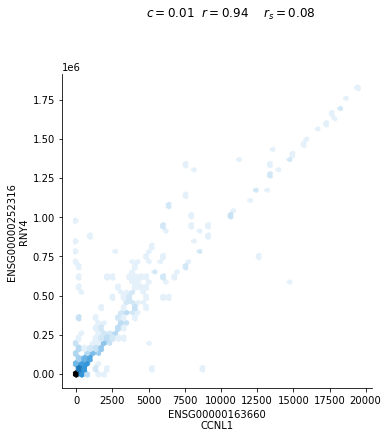

'Index: 3'

('ENSG00000184076', 'ENSG00000160307')

('UQCR10', 'S100B')

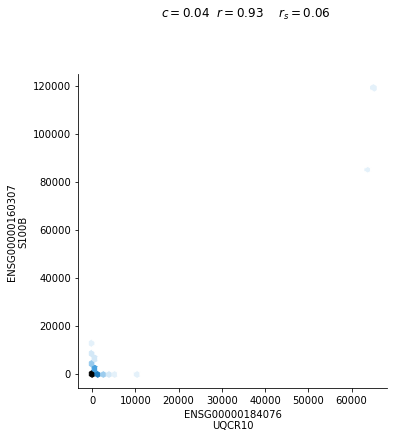

'Index: 4'

('ENSG00000100316', 'ENSG00000263764')

('RPL3', 'SNORD43')

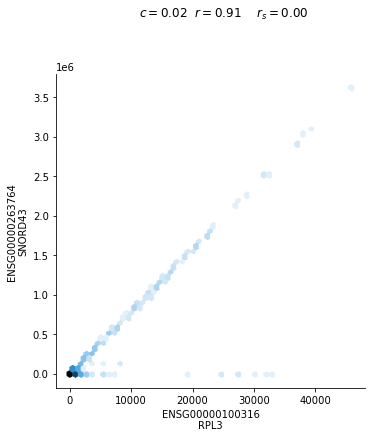

In [94]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection

In [ ]:
gene_pair_subset = "r_vs_c_rs"

gene0_id = ""
gene1_id = ""

plot_and_save_gene_pair(
    gene_expr_df.T,
    gene0_id,
    gene1_id,
    output_file_subset=gene_pair_subset,
)

## Spearman vs Clustermatch

In [412]:
_tmp_df = get_gene_pairs(
    "spearman",
    {
        "Spearman (high)",
        "Clustermatch (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(8341, 6)

,,clustermatch,pearson,spearman,clustermatch_rank,pearson_rank,spearman_rank
ENSG00000213442,ENSG00000199153,0.053819,0.046891,0.465346,3289491.0,8294292.0,10488459.0
ENSG00000215417,ENSG00000207638,0.046376,0.040915,0.462046,2730581.0,7707119.0,10437880.0
ENSG00000213442,ENSG00000283612,0.050829,0.049535,0.459627,3059564.0,8522661.0,10400749.0
ENSG00000207785,ENSG00000198899,0.049484,0.036415,0.454581,2958574.0,7192859.0,10321627.0
ENSG00000213442,ENSG00000199051,0.053418,0.025105,0.454050,3258252.5,5557355.0,10313102.0
...,...,...,...,...,...,...,...
ENSG00000096746,ENSG00000208015,0.025997,0.026615,0.369752,1307771.5,5806452.0,8748521.0
ENSG00000207807,ENSG00000239470,0.029522,0.029503,0.369744,1558936.0,6257095.0,8748349.0
ENSG00000167476,ENSG00000199168,0.059075,0.030094,0.369741,3721089.0,6344491.0,8748290.0
ENSG00000207781,ENSG00000242571,0.031253,0.027021,0.369741,1679915.5,5872515.0,8748289.0


### Preview

'Index: 0'

('ENSG00000213442', 'ENSG00000199153')

('RPL18AP3', 'MIR30D')

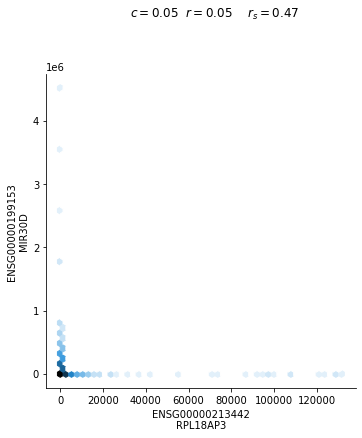

'Index: 1'

('ENSG00000215417', 'ENSG00000207638')

('MIR17HG', 'MIR99A')

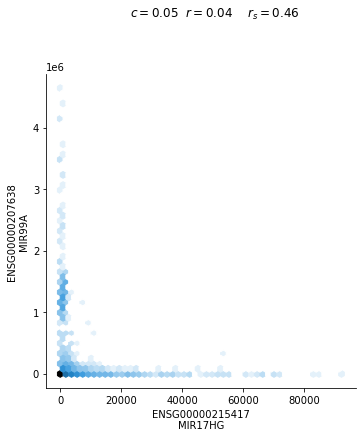

'Index: 2'

('ENSG00000213442', 'ENSG00000283612')

('RPL18AP3', 'MIR103B1')

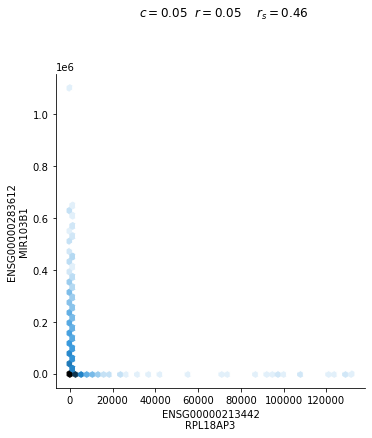

'Index: 3'

('ENSG00000207785', 'ENSG00000198899')

('MIR500A', 'MT-ATP6')

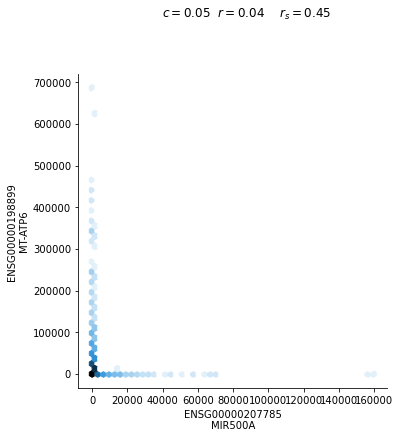

'Index: 4'

('ENSG00000213442', 'ENSG00000199051')

('RPL18AP3', 'MIR361')

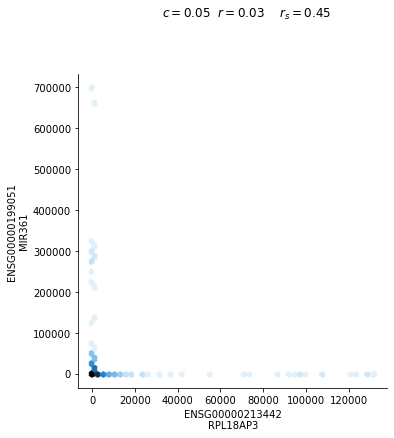

In [413]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Explore

(37032, 2)

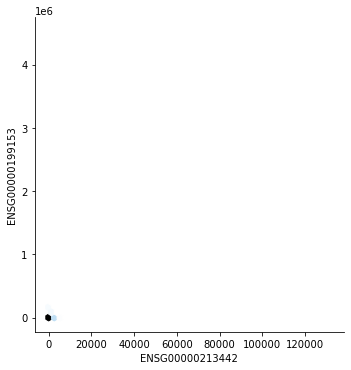

In [478]:
gene0, gene1 = ('ENSG00000213442', 'ENSG00000199153')

gene0_data = gene_expr_df.loc[gene0]
gene1_data = gene_expr_df.loc[gene1]

# gene0_data = gene0_data[gene0_data < 500]
# gene1_data = gene1_data[gene1_data < 100]

_gene_expr_df_sample = pd.concat([gene0_data, gene1_data], axis=1)
_gene_expr_df_sample = _gene_expr_df_sample.dropna()
display(_gene_expr_df_sample.shape)

p = jointplot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    bins=None,
    add_corr_coefs=False,
)

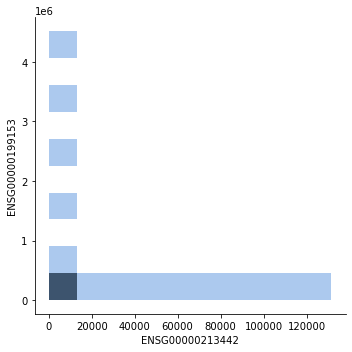

In [484]:
sns.displot(
    data=_gene_expr_df_sample,
    x=gene0,
    y=gene1,
    # kind="kde",
    # thresh=0.50,
    kind="hist",
    bins=10,
)

In [476]:
_gene_expr_df_sample.describe().applymap(str)

,ENSG00000213442,ENSG00000199153
count,37032.0,37032.0
mean,738.1565484672599,7403.130306534659
std,2341.4687059094235,49640.244814384845
min,0.0,0.0
25%,171.01694889512743,0.0
50%,475.99575697767204,0.0
75%,919.517642266216,0.0
max,131539.83169264236,4518107.80862581


In [453]:
x = _gene_expr_df_sample.iloc[:, 0]
y = _gene_expr_df_sample.iloc[:, 1]
c, max_parts, parts = cm(x, y, return_parts=True)
display(c)

0.05381866764849967

In [454]:
pd.Series(parts[1][0]).value_counts()

0    31724
1     5308
dtype: int64

In [455]:
cont_mat = get_cm_contingency_table(max_parts, parts)

In [456]:
cont_mat

array([[ 4802.,   506.],
       [13714., 18010.]])

<AxesSubplot:>

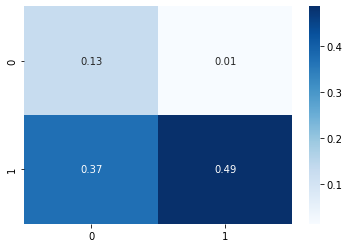

In [457]:
sns.heatmap(cont_mat / cont_mat.sum(), annot=True, fmt='.2f', cmap="Blues")

In [458]:
adj_cont_mat = get_adjusted_contingency_matrix(cont_mat)

<AxesSubplot:>

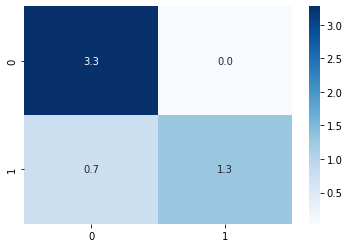

In [459]:
sns.heatmap(adj_cont_mat, annot=True, fmt='.1f', cmap="Blues")

## Spearman vs Pearson

In [97]:
_tmp_df = get_gene_pairs(
    "spearman",
    {
        "Spearman (high)",
        "Pearson (low)",
    },
)

display(_tmp_df.shape)
display(_tmp_df)

(144789, 6)

clustermatch   pearson  spearman  \
ENSG00000207201 ENSG00000278048      0.114613  0.008169  0.554030   
ENSG00000239344 ENSG00000243199      0.115311  0.014501  0.549938   
                ENSG00000234009      0.109224  0.013541  0.546168   
ENSG00000234009 ENSG00000234589      0.106072  0.009691  0.533983   
ENSG00000207201 ENSG00000265185      0.114156  0.014957  0.533817   
...                                       ...       ...       ...   
ENSG00000120948 ENSG00000131171      0.104648  0.003245  0.369740   
ENSG00000266997 ENSG00000224631      0.094476  0.002584  0.369739   
ENSG00000168090 ENSG00000219023      0.084028  0.012553  0.369739   
ENSG00000198563 ENSG00000259185      0.102433  0.008223  0.369739   
ENSG00000240087 ENSG00000160789      0.080531  0.001477  0.369739   

                                 clustermatch_rank  pearson_rank  \
ENSG00000207201 ENSG00000278048          8665918.0     1989622.0   
ENSG00000239344 ENSG00000243199          8715229.0     3482576.0   
                ENSG00000234009          8267063.5     3267187.0   
ENSG00000234009 ENSG00000234589          8019955.5     2361302.0   
ENSG00000207201 ENSG00000265185          8633161.0     3583728.0   
...                                            ...           ...   
ENSG00000120948 ENSG00000131171          7906219.0      772247.0   
ENSG00000266997 ENSG00000224631          7041628.5      610754.0   
ENSG00000168090 ENSG00000219023          6082346.5     3039413.0   
ENSG00000198563 ENSG00000259185          7724693.0     2003064.0   
ENSG00000240087 ENSG00000160789          5745571.0      344211.0   

                                 spearman_rank  
ENSG00000207201 ENSG00000278048     11585271.0  
ENSG00000239344 ENSG00000243199     11546304.0  
                ENSG00000234009     11509619.0  
ENSG00000234009 ENSG00000234589     11383712.0  
ENSG00000207201 ENSG00000265185     11381965.0  
...                                        ...  
ENSG00000120948 ENSG00000131171      8748263.0  
ENSG00000266997 ENSG00000224631      8748256.0  
ENSG00000168090 ENSG00000219023      8748255.0  
ENSG00000198563 ENSG00000259185      8748254.0  
ENSG00000240087 ENSG00000160789      8748253.0  

[144789 rows x 6 columns]

### Preview

'Index: 0'

('ENSG00000207201', 'ENSG00000278048')

('RNU1-148P', 'ENSG00000278048 (no symbol)')

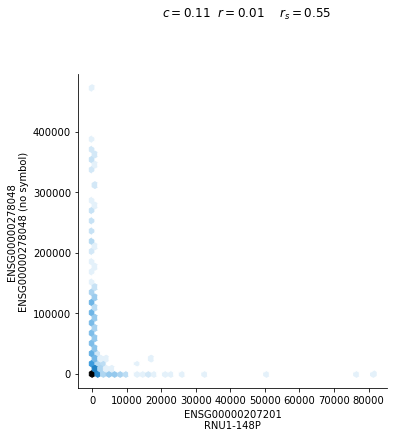

'Index: 1'

('ENSG00000239344', 'ENSG00000243199')

('ENSG00000239344 (no symbol)', 'ENSG00000243199 (no symbol)')

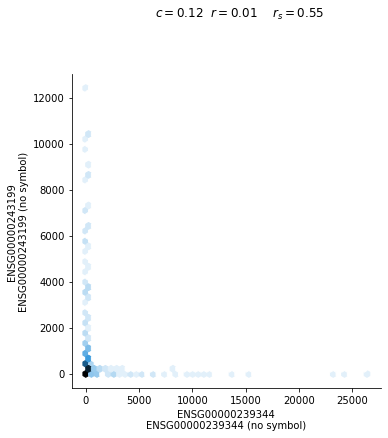

'Index: 2'

('ENSG00000239344', 'ENSG00000234009')

('ENSG00000239344 (no symbol)', 'RPL5P34')

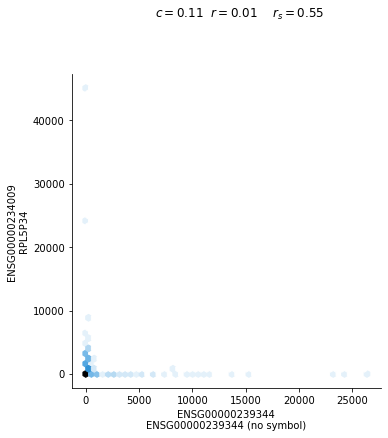

'Index: 3'

('ENSG00000234009', 'ENSG00000234589')

('RPL5P34', 'ENSG00000234589 (no symbol)')

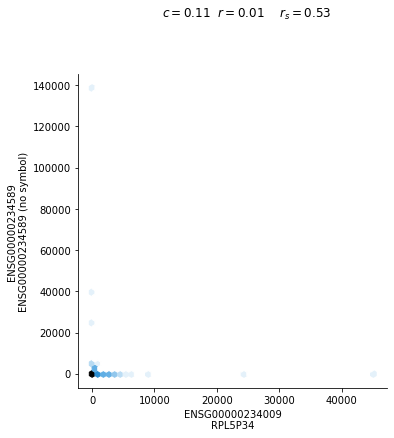

'Index: 4'

('ENSG00000207201', 'ENSG00000265185')

('RNU1-148P', 'SNORD3B-1')

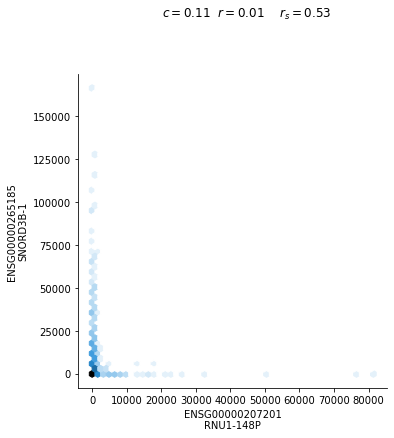

In [98]:
for i in range(min(_tmp_df.shape[0], 5)):
    display(f"Index: {i}")
    p = plot_gene_pair(_tmp_df, i)
    display(p.fig)
    plt.close(p.fig)

### Selection